In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.3443.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.10728.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.790.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.10063.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.2618.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.2875.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.5288.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.4223.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.4253.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.7153.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.2888.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.7275.jpg
/kaggle/input/dog-vs-cat-fastai/dogscats/dogscats/valid/dogs/dog.10894.jpg
/kaggle/input/dog-vs-cat-fastai/dogs

In [3]:
from keras.models import Sequential
from keras.layers import Activation ,Dense ,Dropout ,Flatten ,Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
input_shape=(150,150,3)
img_width=150
img_height=150

In [4]:
batch_size=16
epochs=2
train_data_dir = '/kaggle/input/dog-vs-cat-fastai/dogscats/train'
validation_data_dir = '/kaggle/input/dog-vs-cat-fastai/dogscats/valid'

validation_data_gen=ImageDataGenerator(
rescale=1./255
)
train_data_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_data_gen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator=validation_data_gen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True

)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


NameError: name 'model' is not defined

In [6]:
# creating model
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Activation('sigmoid'))
print(model.summary())


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [7]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=23000 // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2000 // 1
)

/tmp/ipykernel_42/2315496940.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/10
1437/1437 [==============================] - 261s 175ms/step - loss: 0.6855 - accuracy: 0.5458 - val_loss: 0.6368 - val_accuracy: 0.6445
Epoch 2/10
1437/1437 [==============================] - 158s 110ms/step - loss: 0.6583 - accuracy: 0.6229
Epoch 3/10
1437/1437 [==============================] - 160s 112ms/step - loss: 0.6396 - accuracy: 0.6495
Epoch 4/10
1437/1437 [==============================] - 158s 110ms/step - loss: 0.6259 - accuracy: 0.6672
Epoch 5/10
1437/1437 [==============================] - 159s 111ms/step - loss: 0.6085 - accuracy: 0.6857
Epoch 6/10
1437/1437 [==============================] - 158s 110ms/step - loss: 0.6027 - accuracy: 0.6945
Epoch 7/10
1437/1437 [==============================] - 159s 111ms/step - loss: 0.5893 - accuracy: 0.7067
Epoch 8/10
1437/1437 [==============================] - 157s 109ms/step - loss: 0.5749 - accuracy: 0.7167
Epoch 9/10
1437/1437 [==============================] - 161s 112ms/step - loss: 0.5679 - accuracy: 0.7249
Epoc

In [8]:
model.save('catsvsdogs.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
history.history

{'loss': [0.6854880452156067,
  0.6583378314971924,
  0.6396159529685974,
  0.625898003578186,
  0.6084885001182556,
  0.6026637554168701,
  0.5893157124519348,
  0.5748845934867859,
  0.5678576827049255,
  0.55760258436203],
 'accuracy': [0.5457709431648254,
  0.6229115724563599,
  0.6494517922401428,
  0.6672467589378357,
  0.6857379078865051,
  0.6945266127586365,
  0.7066655158996582,
  0.7166840434074402,
  0.7248955965042114,
  0.7354246377944946],
 'val_loss': [0.6367643475532532],
 'val_accuracy': [0.6445000171661377]}

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

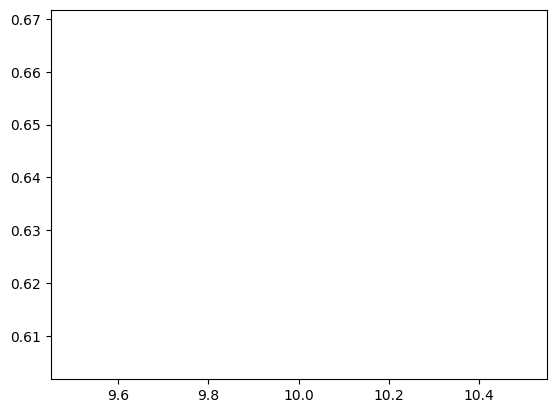

In [11]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(10, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(10, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

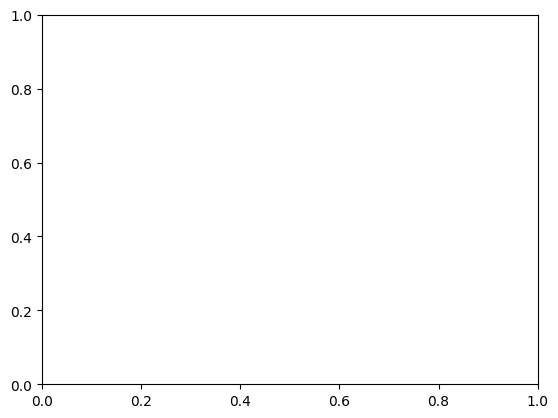

In [12]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

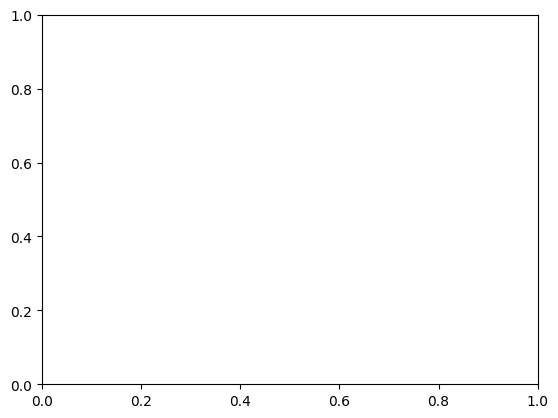

In [13]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_42/121730995.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)


[[1000    0]
 [1000    0]]


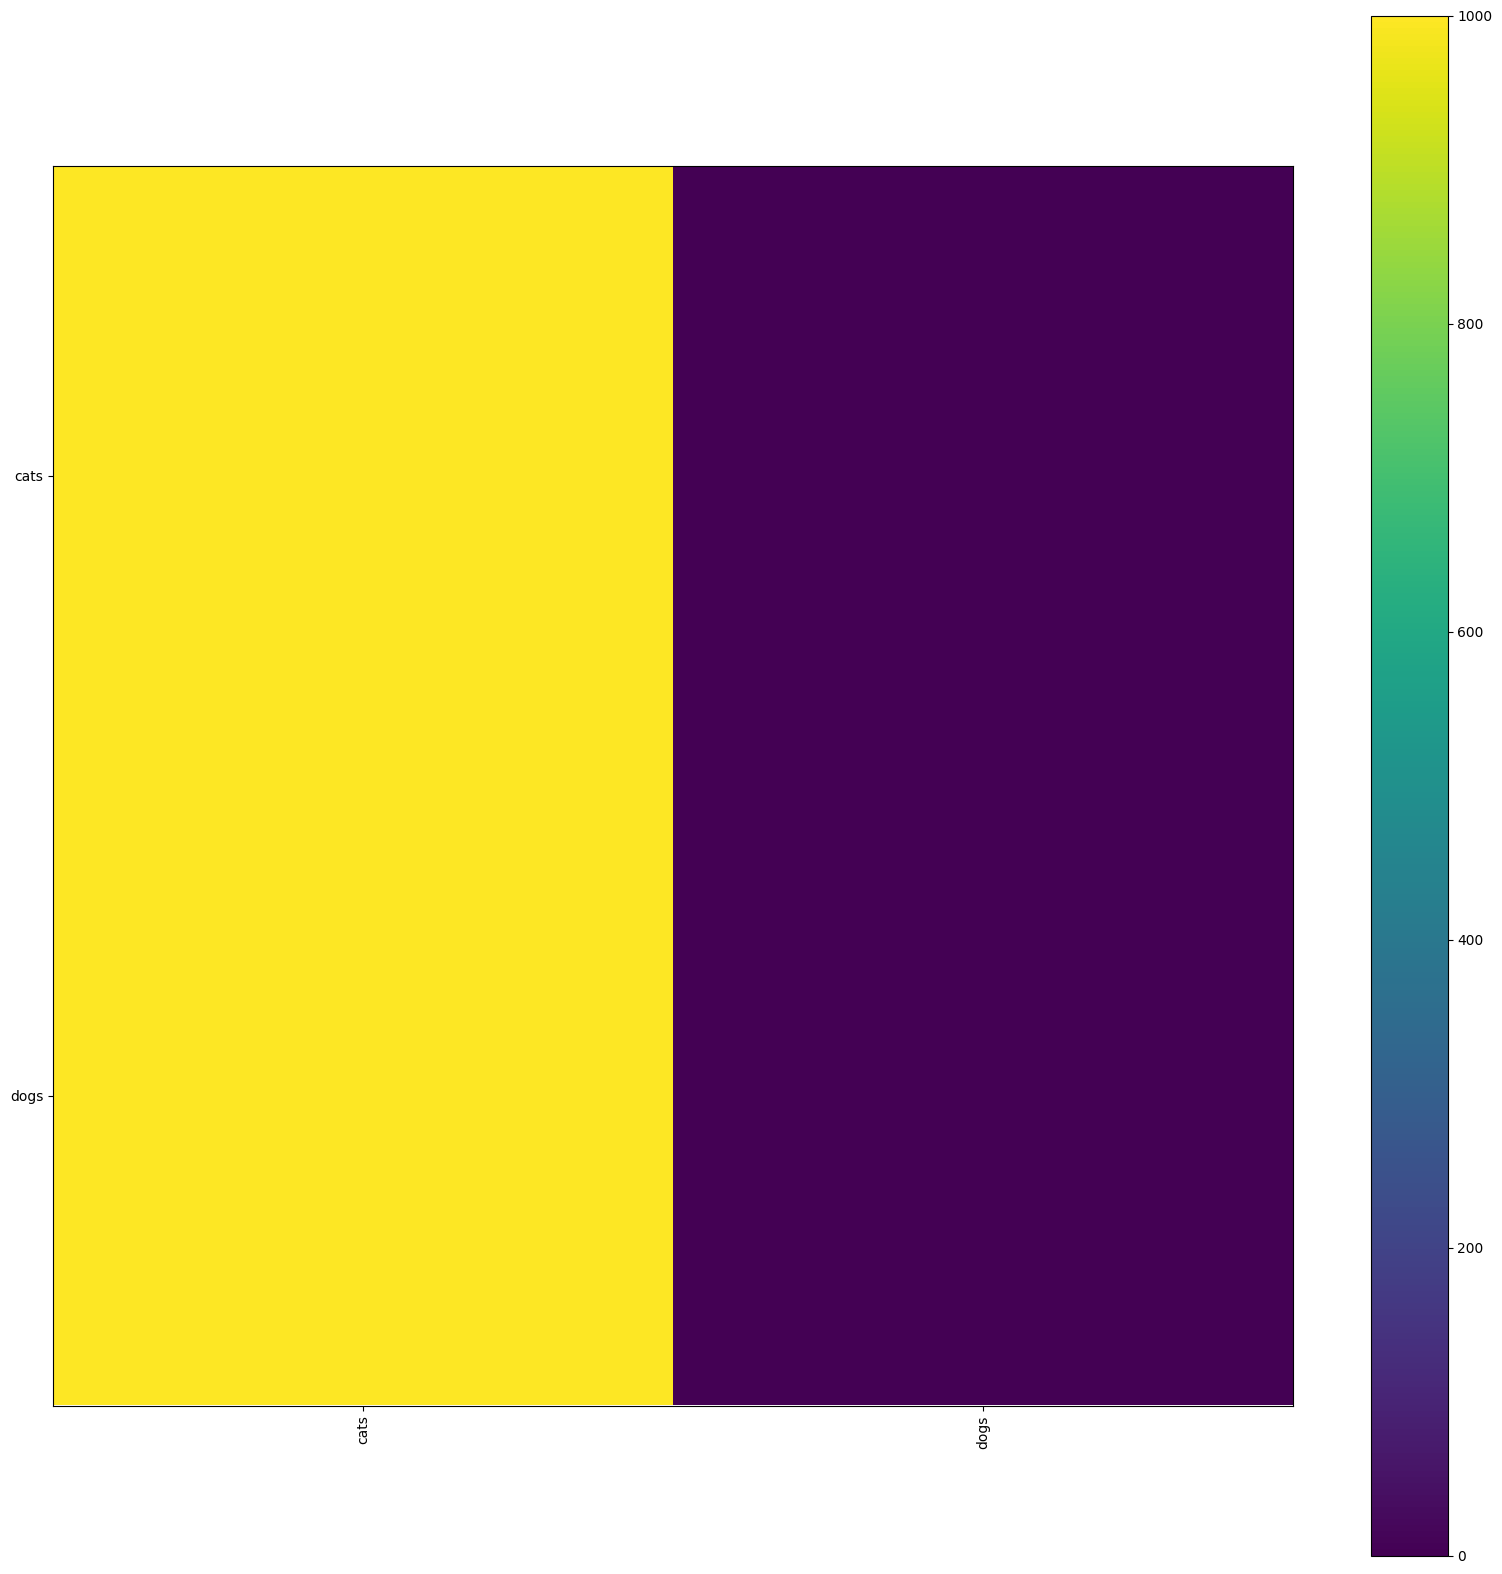

In [14]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 8005
nb_validation_samples = 2023

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(cnf_matrix)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

(1, 150, 150, 3)
1/1 [==============================] - 0s 113ms/step
[[1.]]
[[1.]]
This is dog


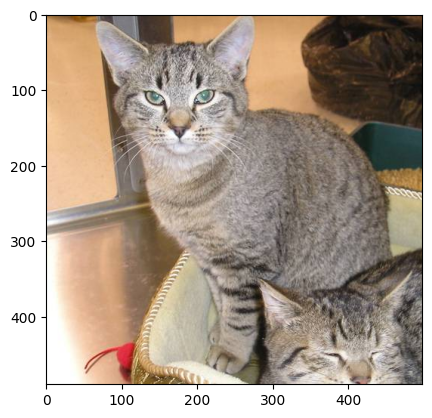

In [19]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = '/kaggle/input/dog-vs-cat-fastai/dogscats/test1/10040.jpg'
model = models.load_model('/kaggle/working/catsvsdogs.h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is dog")
else:
  print("this is cat")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)